# File Name : MLP.ipynb
# Version : 1.0
# Revision : `$Log$`

# Author 1 : Jagwant Sehgal (js3050@rit.edu)
# Author 2 : Kundan Patil (kp4677@rit.edu)
# Author 3 : Abhilekh Chaudhari (ac4241@rit.edu)

# Date : 03/28/2021

## Import necessary library


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from keras.utils import to_categorical
import seaborn as sns; sns.set()

## Read the MNIST data

In [2]:
training_data = pd.read_csv("train.csv") 

## Split data into Training and Testing


In [3]:
Y = training_data["label"]
X = training_data.drop('label', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Y_test_temp = Y_test

num_classes = len(list(np.unique(Y_train)))
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

## Normalize the training data


In [4]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

## Design Model Architecture

In [5]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

## Train the designed model

In [6]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
985/985 [==============================] - 4s 4ms/step - loss: 0.8368 - accuracy: 0.7712 - val_loss: 0.2571 - val_accuracy: 0.9236
Epoch 2/10
985/985 [==============================] - 3s 3ms/step - loss: 0.2173 - accuracy: 0.9353 - val_loss: 0.1803 - val_accuracy: 0.9467
Epoch 3/10
985/985 [==============================] - 3s 3ms/step - loss: 0.1493 - accuracy: 0.9549 - val_loss: 0.1538 - val_accuracy: 0.9548
Epoch 4/10
985/985 [==============================] - 3s 3ms/step - loss: 0.1130 - accuracy: 0.9660 - val_loss: 0.1381 - val_accuracy: 0.9583
Epoch 5/10
985/985 [==============================] - 3s 3ms/step - loss: 0.0898 - accuracy: 0.9721 - val_loss: 0.1333 - val_accuracy: 0.9592
Epoch 6/10
985/985 [==============================] - 3s 3ms/step - loss: 0.0731 - accuracy: 0.9781 - val_loss: 0.1180 - val_accuracy: 0.9637
Epoch 7/10
985/985 [==============================] - 3s 3ms/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.1113 - val_accuracy: 0.9660
Epoch 

## Evaluate the designed model

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(test_loss)

329/329 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9681
0.11452431976795197


## Plot learning curves for the designed model

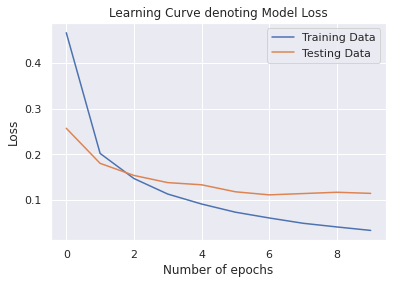

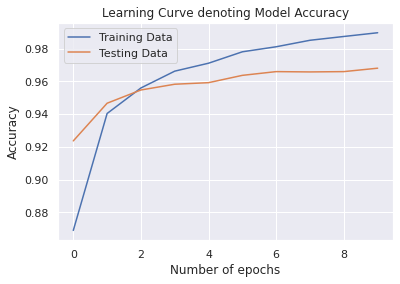

In [8]:
fig = plt.figure()
plt.plot(history.history['loss'], label="Training Data")
plt.plot(history.history["val_loss"], label="Testing Data")
plt.title("Learning Curve denoting Model Loss")
plt.ylabel("Loss")
plt.xlabel('Number of epochs')
plt.legend(loc="upper right")
fig.savefig('Loss.png')
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], label="Training Data")
plt.plot(history.history["val_accuracy"], label="Testing Data")
plt.title("Learning Curve denoting Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Number of epochs')
plt.legend(loc="upper left")
fig.savefig('Accuracy.png')
plt.show()

## Images where correct class probability is very high or very low

In [9]:
probability_estimate = model.predict_proba(X_test)

class_names = [0,1,2,3,4,5,6,7,8,9]
probability_estimate_dataframe = pd.DataFrame(probability_estimate, columns=class_names)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


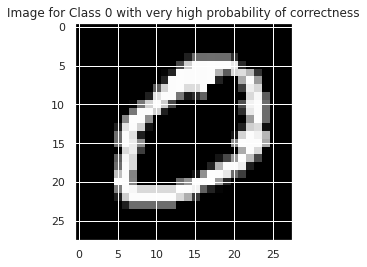

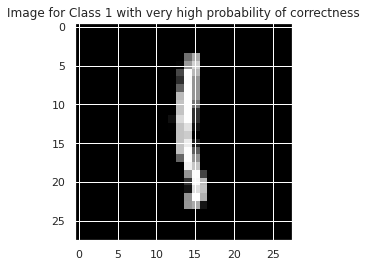

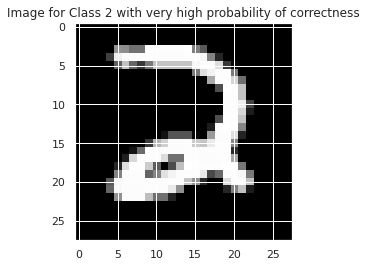

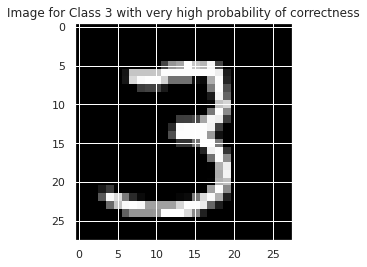

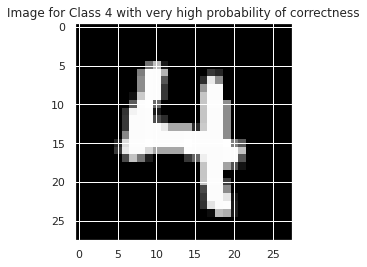

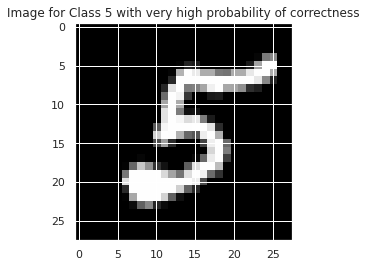

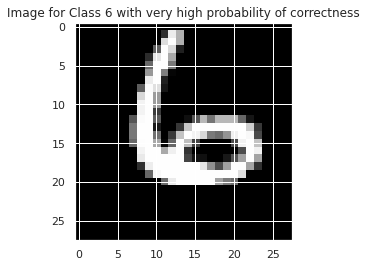

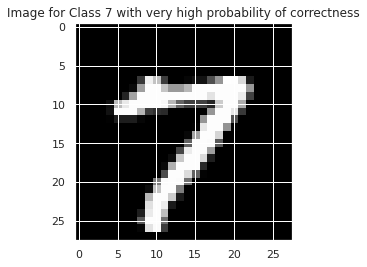

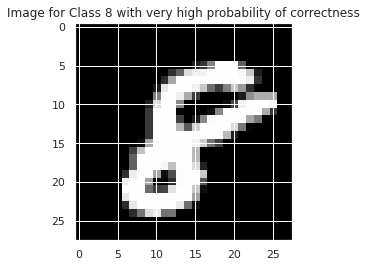

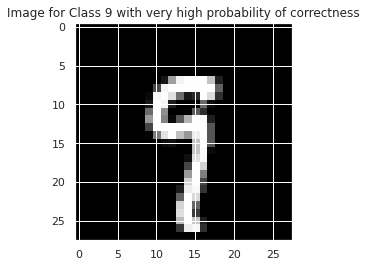

In [10]:
for column in probability_estimate_dataframe.columns:
  column_data = probability_estimate_dataframe[column]
  numpy_column_data = np.array(column_data)
  max_index = np.argmax(numpy_column_data)
  data = X_test.iloc[max_index,:]
  image_data = np.array(data)
  image_data_reshaped = np.reshape(image_data, (28,28))
  plt.title("Image for Class "+str(column)+" with very high probability of correctness")
  plt.imshow(image_data_reshaped, cmap="gray")
  plt.show()

## Plot confusion matrix

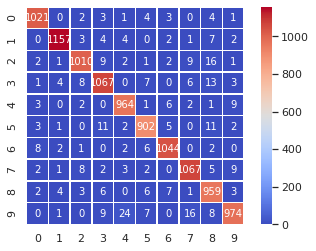

In [11]:
y_pred = model.predict(X_test)
y_pred_temp = np.argmax(y_pred, axis=1)

class_names = ["0","1","2","3","4","5","6","7","8","9"]
confusion_matrix_data = confusion_matrix(Y_test_temp, y_pred_temp)

sns.heatmap(confusion_matrix_data, square=True,annot=True,fmt="d",linewidths=.5, cbar=True,cmap="coolwarm")